# Predicting Diamond Prices
## Phase 2: Statistical Modelling

 **Group Name:** Group 5 demons <br>
 **Group Member:** <br>
 Saumya Anand s3931404<br>
 Nikith Kaluwitharana - s3943409<br>
 Ritish Kandel - s3947204<br>
 Jayden Carr - s3900432

## Table of Contents
- [Introduction](#intro)
- [Statistical Modelling](#sm)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)

## Introduction <a id='intro'></a>

### Phase 1 Summary

Phase 1 Summary

The accurate prediction of the price of diamonds has many benefits to each stakeholder, which includes; buyers, sellers, businesses and large scale companies. The goal of phase 1 was to help to see if the price could be predicted using multiple linear regression graphs.

While some insights were gained by observing the price in respect to the clarity and carat which showed that as the carat goes higher, and as the clarity is better, the price increases, meaning that the carat and clarity affect the price more so than others where the cuts was opposed to clarity in respect to price where both performed differently for each category they were in, meaning that those two factors together could not determine the price entirely. 


### Report Overview

A complete and accurate overview of the contents of your Phase 2 report. Clarification: A Table of Contents is not a report overview.

### Overview of Methodology

A detailed, complete, and accurate overview of your statistical modelling methodology (which is multiple linear regression). More specifically, in this subsection, you will provide a summary of your "Statistical Modelling" section below.

## Statistical Modelling <a id='sm'></a>

(Statistical Modelling Section: Details of assumptions check, model selection, plots of residuals, and technical analysis of regression results.)

**NOTE:** The second half of [this](https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb) regression case study ("Statistical Modeling and Performance Evaluation" Section) will be **very helpful** for this section.

### Full Model Overview

Overview of your full model, including the variables and terms you are using in your model.

#### Module Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group5.csv')
df.columns = [colname.replace(' ', '_') for colname in list(df.columns)]
encoded = pd.get_dummies(df, drop_first=True)
encoded.columns = [colname.replace(' ', '_') for colname in list(encoded.columns)]

formula_string_indep_vars_encoded = ' + '.join(encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


In [8]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=encoded)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:13:38   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2184.4774    408.197      5.352

In [9]:
residuals_full = pd.DataFrame({'actual': encoded['price'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
print(residuals_full.head())
residuals_full[residuals_full['actual']>3000]

   actual    predicted     residual
0     326 -1346.364288  1672.364288
1     326  -664.595411   990.595411
2     327   211.107106   115.892894
3     334  -830.737177  1164.737177
4     335 -3459.224220  3794.224220


,actual,predicted,residual
1536,3001,2448.075406,552.924594
1537,3001,2472.250657,528.749343
1538,3001,2603.215908,397.784092
1539,3001,3312.884108,-311.884108
1540,3001,4032.764571,-1031.764571
...,...,...,...
27745,18803,14404.475751,4398.524249
27746,18804,14650.197463,4153.802537
27747,18806,11897.354146,6908.645854
27748,18818,14933.134559,3884.865441


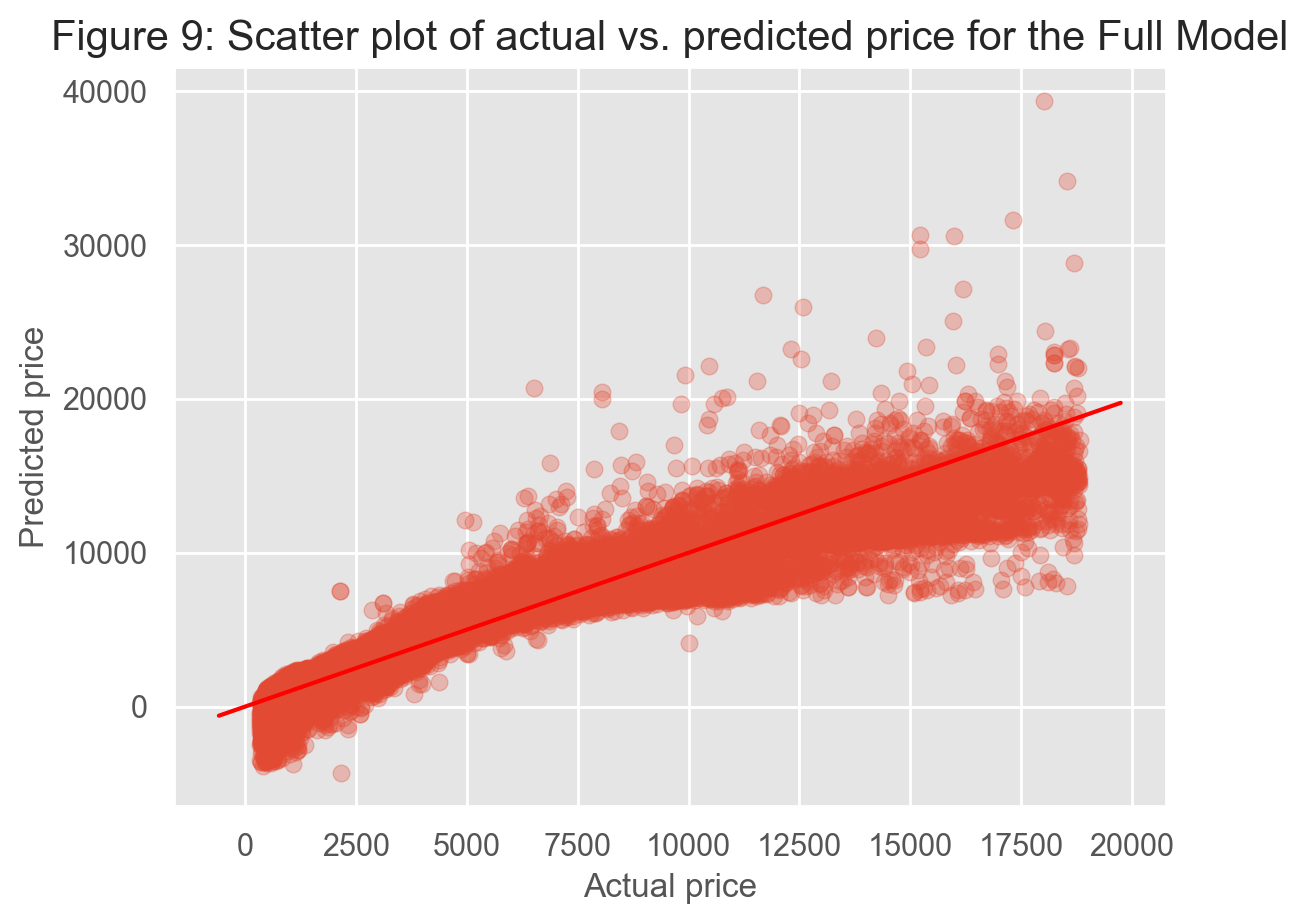

In [10]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual price');
plt.ylabel('Predicted price');
plt.title('Figure 9: Scatter plot of actual vs. predicted price for the Full Model', fontsize=15);
plt.show();

### Full Model Diagnostic Checks

Conditions for least squares line
- the data should follow a linear trend
- the residuals should be nearly normal
- the variability of points around the least squares line remains fairly constant
- the observations should be independent

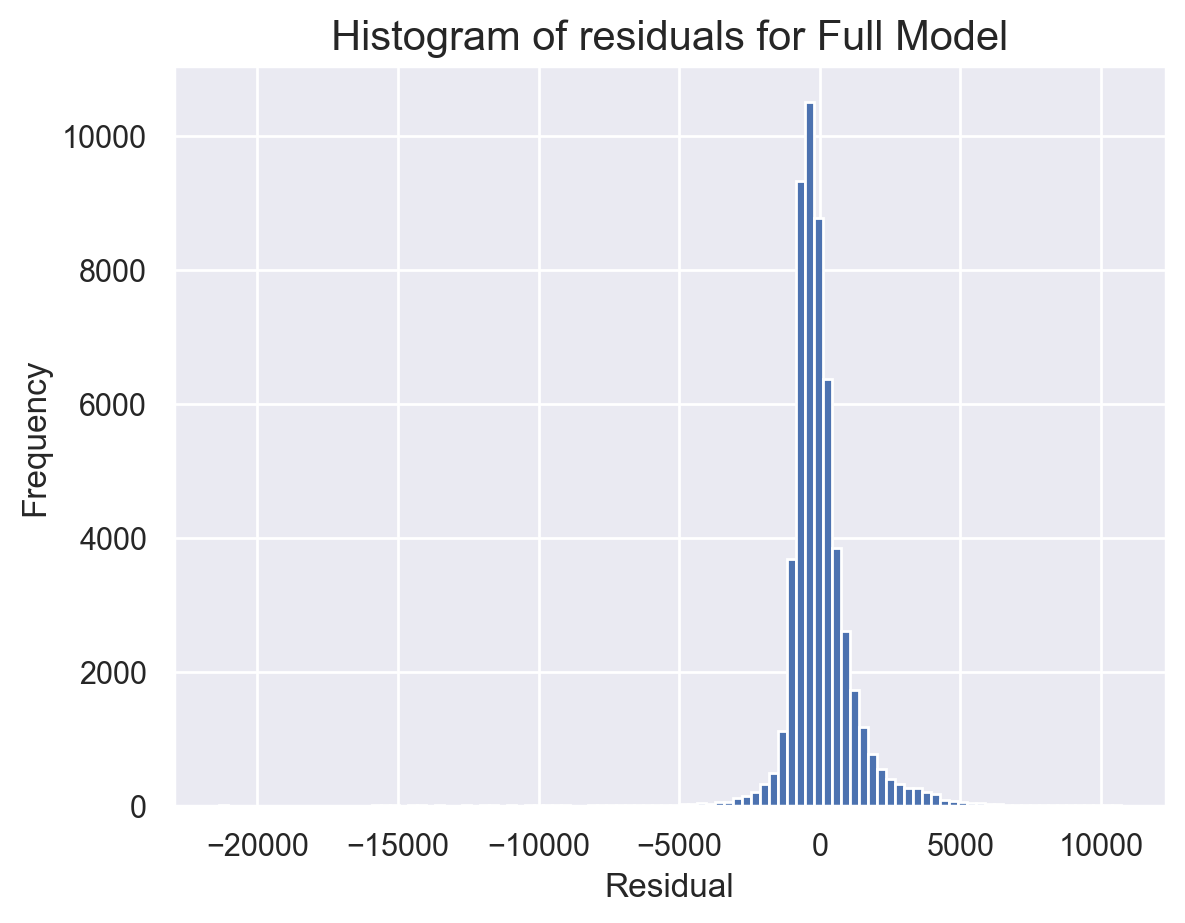

In [27]:
sns.set_theme()
plt.hist(residuals_full['residual'], bins =100);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of residuals for Full Model', fontsize=15);
plt.show();

In [ ]:
The distribution 

### Feature Selection

You can use the code below to to perform backward feature selection using p-values ([credit](https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb)).

In [12]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:13:39   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Reduced Model Overview

Overview of your reduced model, including the variables and terms you are using in your model.

### Reduced Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the reduced model.

## Critique & Limitations <a id='cl'></a>

Critique & Limitations of your approach: strengths and weaknesses in detail.

## Summary & Conclusions <a id='sc'></a>

### Project Summary

A comprehensive summary of your entire project (both Phase 1 and Phase 2). That is, what exactly did you do in your project? (Example: I first cleaned the data in such and such ways. And then I applied multiple linear regression techniques in such and such ways. etc).

### Summary of Findings

A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?

### Conclusions

Your detailed conclusions as they relate to your goals and objectives.